In [429]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

In [430]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

## Nowness
sampling_data = diabetes_data[diabetes_data["Age"] > 40].sample(n=150)

## Historical
diabetes_data.drop(sampling_data.index, inplace=True)

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [431]:
sampling_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000
mean,6.960000,132.713333,77.206667,17.766667,67.613333,33.002667,0.479173,49.94000,0.546667
std,3.626672,35.277298,15.767734,17.599732,113.785020,7.291964,0.341048,8.16214,0.499485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,41.00000,0.000000
25%,5.000000,106.000000,72.000000,0.000000,0.000000,28.825000,0.235750,43.00000,0.000000
50%,7.000000,134.000000,78.000000,21.500000,0.000000,33.300000,0.362500,48.00000,1.000000
75%,9.000000,158.000000,85.000000,31.750000,123.250000,37.475000,0.637750,54.75000,1.000000
max,17.000000,197.000000,114.000000,99.000000,543.000000,47.900000,1.781000,81.00000,1.000000


In [432]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,3.088997,118.025890,67.139159,21.208738,82.757282,31.747411,0.470105,29.187702,0.300971
std,2.829603,30.463667,19.643336,15.466704,115.492572,8.007673,0.329184,8.461010,0.459052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,97.000000,62.000000,0.000000,0.000000,26.800000,0.245000,23.000000,0.000000
50%,2.000000,114.000000,70.000000,23.000000,48.500000,31.600000,0.372500,27.000000,0.000000
75%,5.000000,135.000000,78.000000,33.000000,128.750000,36.300000,0.617750,33.000000,1.000000
max,14.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,72.000000,1.000000


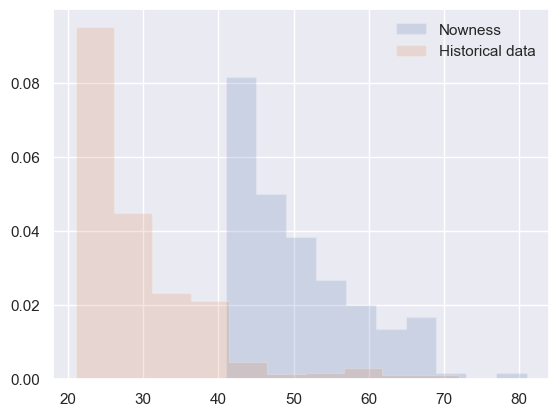

In [433]:
# r = np.linspace(0,10)
fig, ax = plt.subplots(1, 1)
ax.hist(sampling_data["Age"], density=True, histtype='stepfilled', alpha=0.2, label="Nowness")
ax.hist(diabetes_data["Age"], density=True, histtype='stepfilled', alpha=0.2, label="Historical data")
ax.legend(loc='best', frameon=False)
plt.show()

In [434]:
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, 1 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               618 non-null    int64  
 1   Glucose                   618 non-null    int64  
 2   BloodPressure             618 non-null    int64  
 3   SkinThickness             618 non-null    int64  
 4   Insulin                   618 non-null    int64  
 5   BMI                       618 non-null    float64
 6   DiabetesPedigreeFunction  618 non-null    float64
 7   Age                       618 non-null    int64  
 8   Outcome                   618 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.3 KB


In [435]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       4
BloodPressure                32
SkinThickness               162
Insulin                     279
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


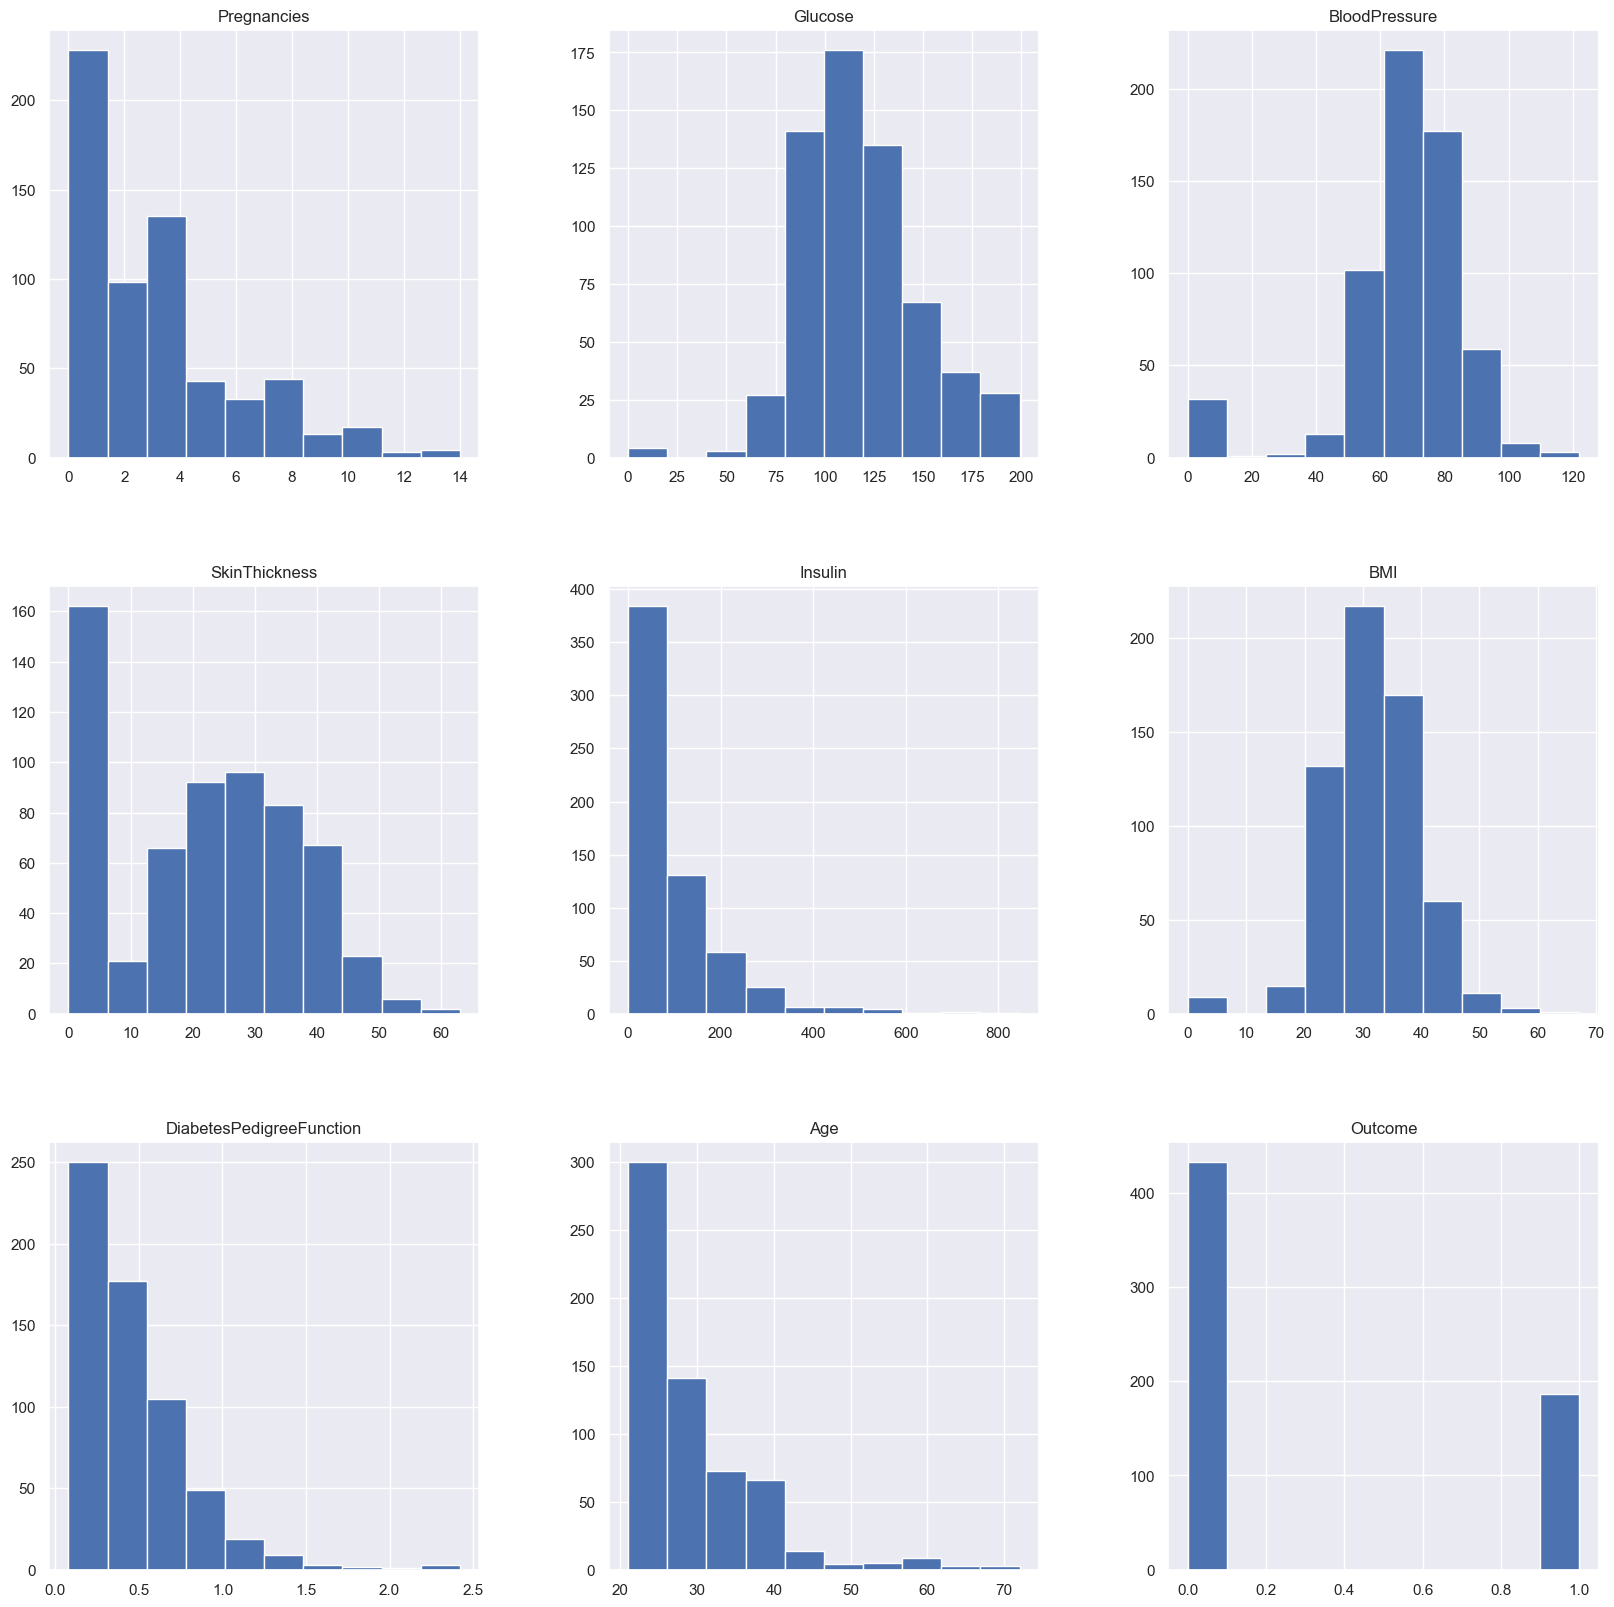

In [436]:
p = diabetes_data.hist(figsize = (20,20))

In [437]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [438]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"], axis = 1)), 
                  columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                     'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = diabetes_data_copy.Outcome

In [439]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [440]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [441]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max train score 100.0 % and k = [1]
Max test score 75.24271844660194 % and k = [1, 12]


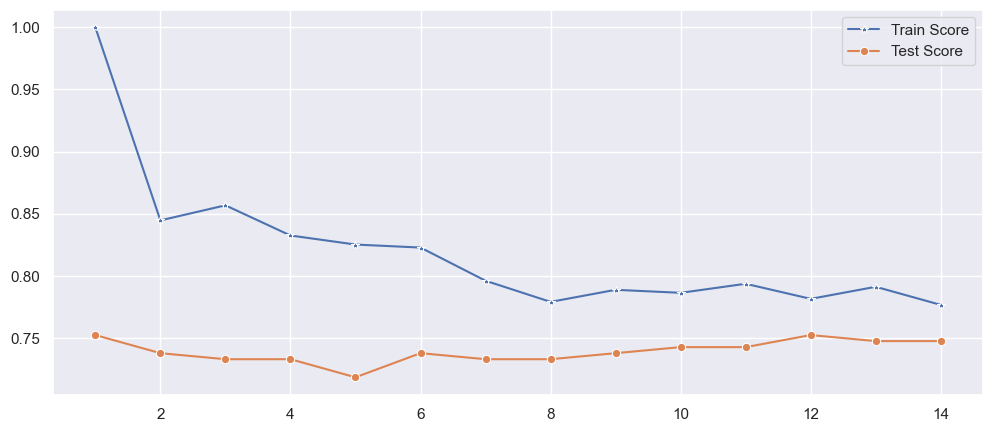

In [442]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1,15), y=test_scores,marker='o',label='Test Score')

In [443]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7427184466019418

Save Historical data

In [444]:
X_hist =  pd.DataFrame(sc_X.transform(diabetes_data_copy.drop(["Outcome"], axis = 1)), 
                  columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                     'BMI', 'DiabetesPedigreeFunction', 'Age'])

X_hist["Outcome"] = pd.DataFrame(data=diabetes_data_copy["Outcome"].values, columns=["Outcome"])
X_hist.to_csv("historical_diabetes.csv")

knn.score(X_hist.drop(["Outcome"], axis = 1), X_hist["Outcome"])

0.7766990291262136

Save Nowness data

In [445]:
X_nowness =  pd.DataFrame(sc_X.transform(sampling_data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

X_nowness["Outcome"] = pd.DataFrame(data=sampling_data["Outcome"].values, columns=["Outcome"])
X_nowness.to_csv("nowness_diabetes.csv")

knn.score(X_nowness.drop(["Outcome"], axis = 1), X_nowness["Outcome"])

0.64

In [446]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "diabetes_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(knn, file)